# Explorar e compreender os dados:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('synthetic_online_retail_data.csv')
df

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,67967,2024-05-04,965,40,Books & Stationery,Notebook,3,495.24,Cash on Delivery,Hodgemouth,NaN,NaN,30
996,99828,2024-09-12,510,40,Books & Stationery,Story Book,5,427.73,Credit Card,Douglastown,3.0,F,72
997,92290,2024-11-06,445,10,Electronics,Smartphone,5,354.64,Bank Transfer,New Amberville,NaN,M,49
998,61427,2024-09-17,410,10,Electronics,Laptop,4,221.54,Cash on Delivery,New Sean,3.0,M,71


In [2]:
df.info() # data types and non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [3]:
df.describe() # statistics for numerical columns | no date,category_name,product_name,payment_method,city,gender

,customer_id,product_id,category_id,quantity,price,review_score,age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,799.000000,1000.000000
mean,55490.723000,540.726000,30.030000,2.947000,251.850660,3.992491,46.382000
std,25910.185857,261.737704,14.370303,1.413573,139.194688,1.239469,16.569992
min,10201.000000,100.000000,10.000000,1.000000,10.720000,1.000000,18.000000
25%,33857.000000,311.750000,20.000000,2.000000,128.525000,3.000000,32.000000
50%,54619.500000,542.500000,30.000000,3.000000,250.220000,4.000000,47.000000
75%,77848.500000,770.750000,40.000000,4.000000,366.467500,5.000000,61.000000
max,99923.000000,995.000000,50.000000,5.000000,499.500000,5.000000,75.000000


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

customer_id         0
order_date          0
product_id          0
category_id         0
category_name       0
product_name        0
quantity            0
price               0
payment_method      0
city                0
review_score      201
gender            103
age                 0
dtype: int64

In [6]:
df["review_score"] = df["review_score"].fillna(df['review_score'].median())
df["gender"] = df["gender"].fillna("Unknown")
df.isnull().sum()

customer_id       0
order_date        0
product_id        0
category_id       0
category_name     0
product_name      0
quantity          0
price             0
payment_method    0
city              0
review_score      0
gender            0
age               0
dtype: int64

In [7]:
# correcting the data types
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['gender'] = df['gender'].astype('category')
df['category_name'] = df['category_name'].astype('string')
df['product_name'] = df['product_name'].astype('string')
df['city'] = df['city'].astype('string')
df['payment_method'] = df['payment_method'].astype('category')
df['review_score'] = df['review_score'].astype('int8')

In [8]:
df['total_price'] = df['quantity'] * df['price'] #new column for total price, good example for correlation

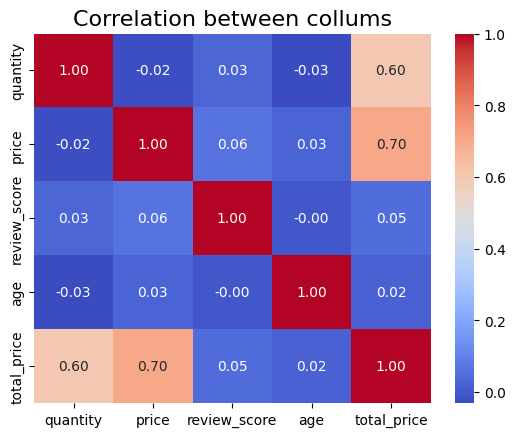

In [9]:
#https://www.w3schools.com/python/pandas/pandas_correlations.asp#:~:text=The%20corr()%20method%20calculates,%3A%20'data.csv'.
#https://stackoverflow.com/questions/39409866/correlation-heatmap

# removing non numerical columns for correlation df
dfCorr = df.drop(columns=["customer_id","order_date", "product_id", "category_id", "category_name", "product_name", "payment_method", "city","gender"])
# 1 = if one column increases, the other column also increases
# -1 = if one column increases, the other column decreases
correlation_matrix = dfCorr.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation between collums", fontsize=16)
plt.show()

total_price é diretamente proporcional a quantity e price, por seu calculo ser o produto de ambos

<StringArray>
[       'Electronics',  'Sports & Outdoors', 'Books & Stationery',
            'Fashion',      'Home & Living']
Length: 5, dtype: string


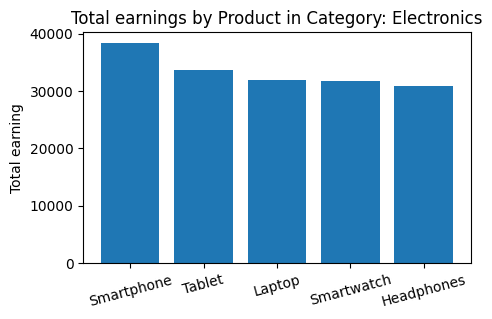

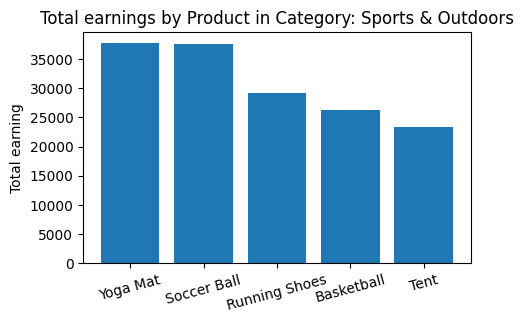

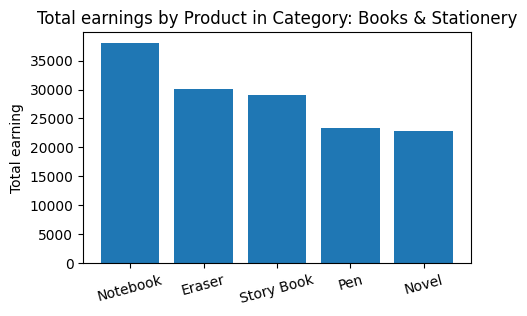

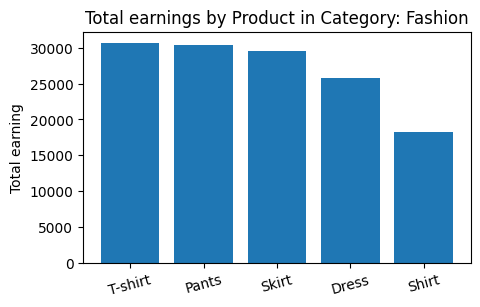

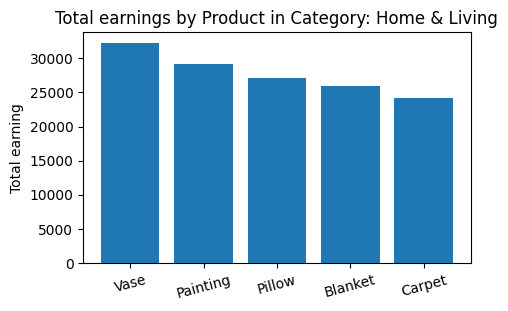

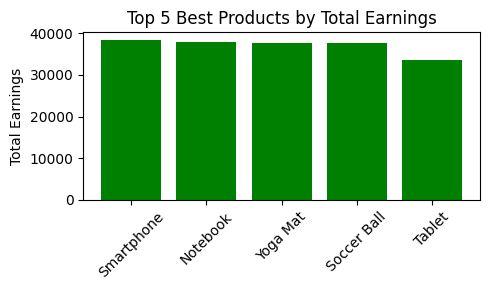

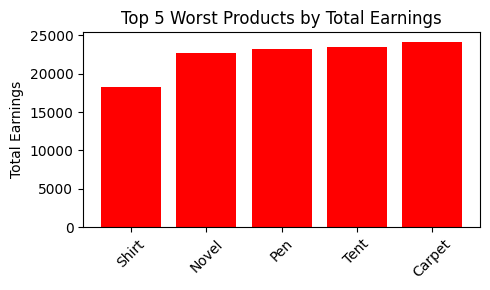

In [10]:
#most bought product by category analysis
print(df["category_name"].unique())

for i in df["category_name"].unique():
    filtered_df = df[df["category_name"] == i]
    #observed to remove the warning
    result = filtered_df.groupby(["product_name"],observed=True).sum("total_price").reset_index().sort_values(by="total_price", ascending=False)
    
    
    result = result[result["total_price"] > 0]
    
    plt.figure(figsize=(5, 3))
    plt.bar(result["product_name"], result["total_price"])
    plt.xticks(rotation=15)
    plt.ylabel("Total earning")
    plt.title(f"Total earnings by Product in Category: {i}")
    plt.show()

#most bought products analysis - top 5 good and bad
order = {"green": False, "red": True}
for key,value in order.items():
    string = "Worst"
    if not value:
        string = "Best"
    
    top5 = df.groupby(["product_name"],observed=True).sum("total_price").reset_index().sort_values(by="total_price", ascending=value).head(5)

    plt.figure(figsize=(5, 3))
    plt.bar(top5["product_name"], top5["total_price"], color=key)
    plt.xticks(rotation=45)
    plt.ylabel("Total Earnings")
    plt.title(f"Top 5 {string} Products by Total Earnings")
    plt.tight_layout()
    plt.show()



Aqui temos o top 5 produtos de cada categoria apatir do total dos ganhos, que é a somatorio de total_price por cada produto dentro de uma categoria.

Também temos o top 5 melhores e piores produtos de toda a loja, apatir do total dos ganhos

In [11]:
#new prdocut id column as the current one isnt unique

# df[df["product_id"] == 682]

df["unique_product_id"] = df["product_id"].astype(str) + "_" + df["category_name"].str[0:3] + "_" + df["product_name"].str[0:3]
df.drop(columns=["product_id"], inplace=True)

df[["category_name", "product_name", "unique_product_id"]].head()

,category_name,product_name,unique_product_id
0,Electronics,Smartphone,784_Ele_Sma
1,Sports & Outdoors,Soccer Ball,682_Spo_Soc
2,Sports & Outdoors,Tent,684_Spo_Ten
3,Books & Stationery,Story Book,204_Boo_Sto
4,Fashion,Skirt,202_Fas_Ski


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        1000 non-null   int64         
 1   order_date         1000 non-null   datetime64[ns]
 2   category_id        1000 non-null   int64         
 3   category_name      1000 non-null   string        
 4   product_name       1000 non-null   string        
 5   quantity           1000 non-null   int64         
 6   price              1000 non-null   float64       
 7   payment_method     1000 non-null   category      
 8   city               1000 non-null   string        
 9   review_score       1000 non-null   int8          
 10  gender             1000 non-null   category      
 11  age                1000 non-null   int64         
 12  total_price        1000 non-null   float64       
 13  unique_product_id  1000 non-null   string        
dtypes: catego

In [13]:
#filtrar apenas para essas colunas já que outras não são numéricas ou numericas mas que não são relevantes para essas análises (data,ids)
df[['quantity','price', 'total_price','age', 'review_score']].describe()

,quantity,price,total_price,age,review_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.947000,251.850660,737.326880,46.382000,3.994000
std,1.413573,139.194688,566.404843,16.569992,1.107787
min,1.000000,10.720000,20.840000,18.000000,1.000000
25%,2.000000,128.525000,285.837500,32.000000,4.000000
50%,3.000000,250.220000,592.785000,47.000000,4.000000
75%,4.000000,366.467500,1081.040000,61.000000,5.000000
max,5.000000,499.500000,2437.650000,75.000000,5.000000


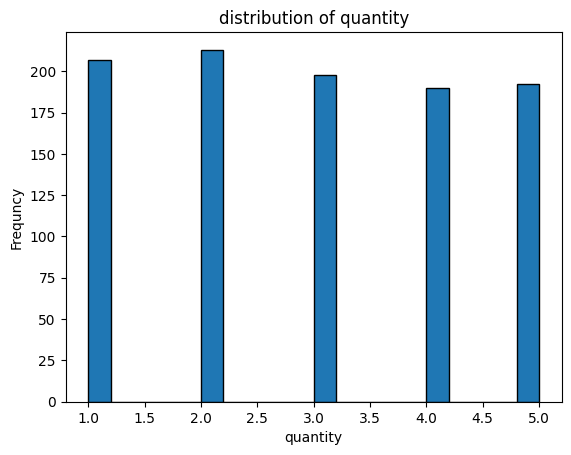

Maior valor quantity: [2.] com Frequencia 213.0


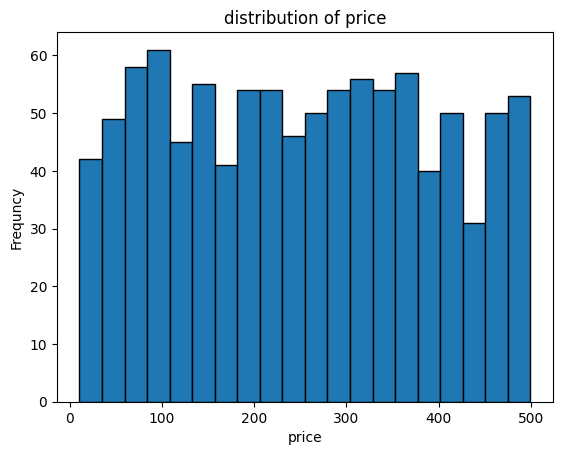

Maior valor price: [84.037] com Frequencia 61.0


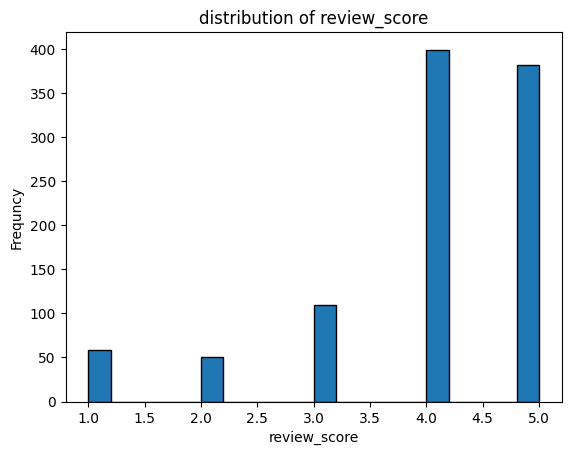

Maior valor review_score: [4.] com Frequencia 399.0


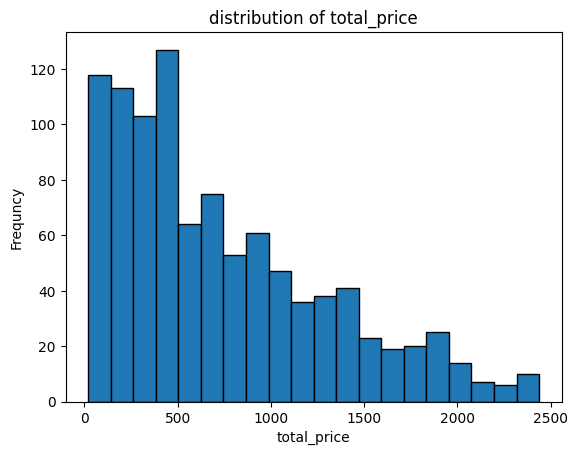

Maior valor total_price: [383.3615] com Frequencia 127.0


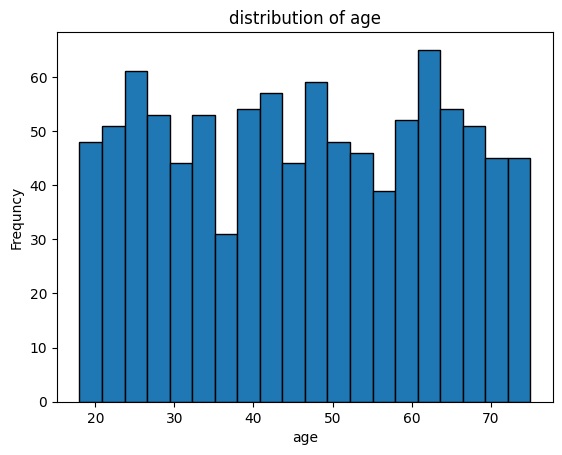

Maior valor age: [60.75] com Frequencia 65.0


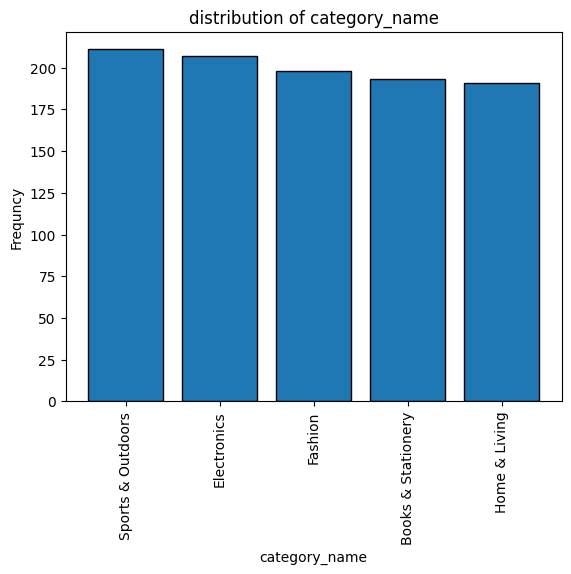

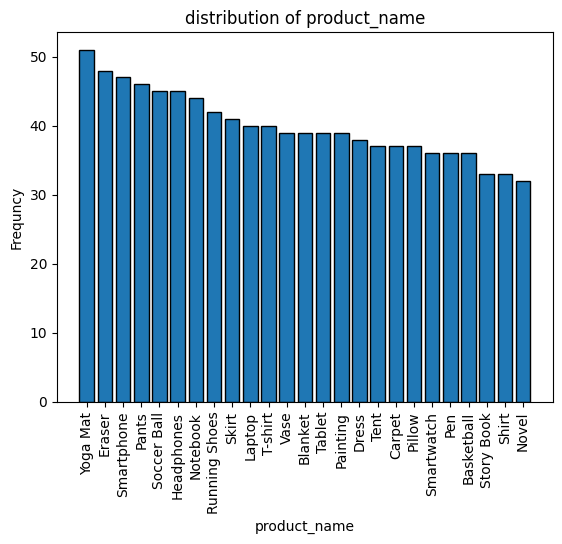

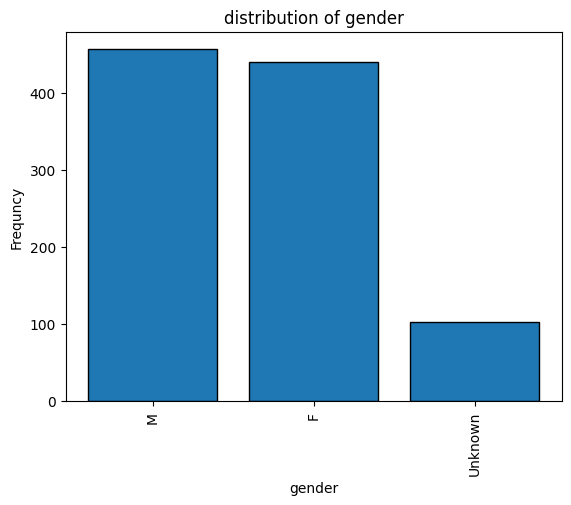

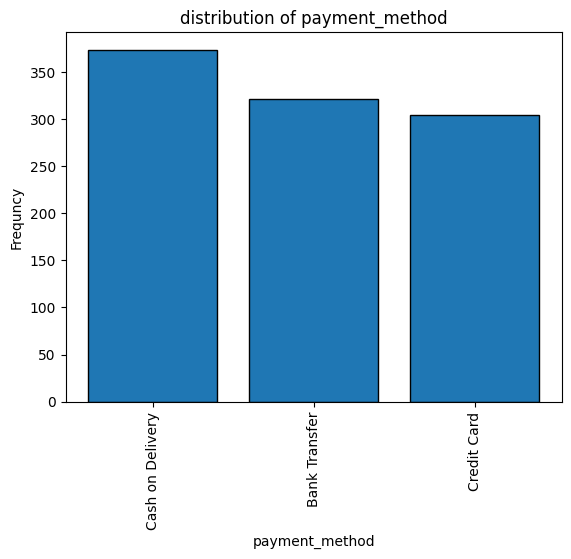

In [14]:
#https://stackoverflow.com/questions/15558136/obtain-the-max-y-value-of-a-histogram
for col in ['quantity', 'price', 'review_score',  'total_price', 'age']:
    highestY, xAxis , _ = plt.hist(df[col], bins=20, edgecolor='black') #edgecolor pra ter melhor separação (pricipalmente pro price)
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequncy')
    plt.show()
    print(f'Maior valor {col}: {xAxis[np.where(highestY == highestY.max())]} com Frequencia {highestY.max()}')

#city not considered
for col in ['category_name', 'product_name',  'gender', 'payment_method']:
    plt.bar(df[col].value_counts().index, df[col].value_counts(), edgecolor='black')
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90) #poder ler
    plt.ylabel('Frequncy')
    plt.show()



## Insights apatir das distribuições:

quantity - Balanceado com a quantidade 2 sendo a mais frequente.

price - Balanceado com preços de valor 84 tendo a maior frequencia.

review_score - Tencendia ao score 4 ou 5, sendo o score 4 o com maior frequencia. Provavelmente por causa da forma que fillna() utiliza a media.

total_price - Uma tendencia bem maior a compras com preços menores que 500, sendo o valor 383 o com maior frequencia.

age - Balanceado com a idade 65 sendo a mais frequente, mas importante ver que 25 é a segunda.

category_name - Bem balanceado mas com Sport & Outdoor sendo o mais frequente (vendido).

product_name - Relativamente bem distribuido com Yoga Mat com maior frequencia (também é o 3 maior ganho da loja), seguido de borracha que não aparece no top 5 maiores ganhos da loja.

gender - Valores proximos entre M e F, mas Unknown (previamente vazios) tem pouca frequencia.

payment_method - Balanceado com dinheiro na entrega sendo o mais frequente.

In [15]:
df.head()

,customer_id,order_date,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age,total_price,unique_product_id
0,13542,2024-12-17,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1,F,56,746.72,784_Ele_Sma
1,23188,2024-06-01,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,4,M,59,1496.70,682_Spo_Soc
2,55098,2025-02-04,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5,F,64,115.00,684_Spo_Ten
3,65208,2024-10-28,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5,M,34,460.22,204_Boo_Sto
4,63872,2024-05-10,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1,F,33,706.88,202_Fas_Ski


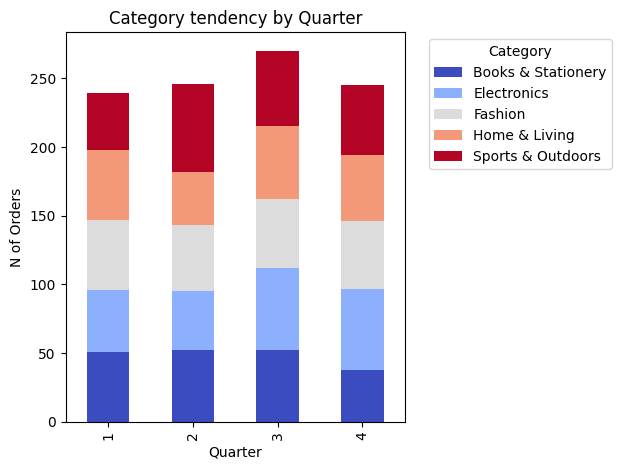

In [16]:
df['quarter'] = df['order_date'].dt.quarter
category_trend = df.groupby(['quarter', 'category_name']).size().unstack()
category_trend.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Category tendency by Quarter')
plt.xlabel('Quarter')
plt.ylabel('N of Orders')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

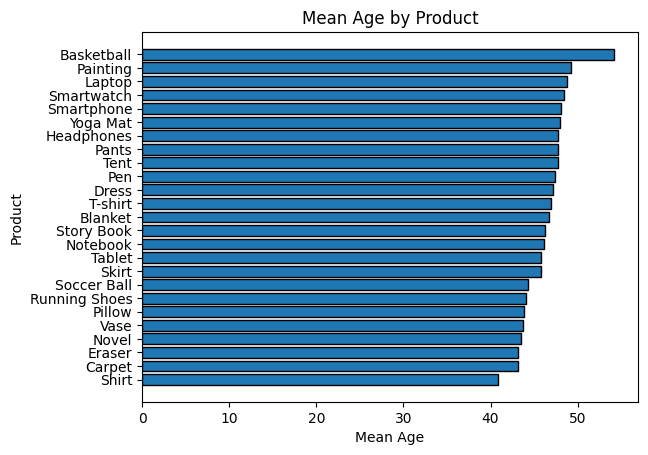

In [17]:
age_mean = df.groupby('product_name')['age'].mean().sort_values()
plt.barh(age_mean.index, age_mean.values, edgecolor='black', )
plt.title('Mean Age by Product')
plt.xlabel('Mean Age')
plt.ylabel('Product')
plt.show()

C:\Users\jomac\AppData\Local\Temp\ipykernel_17336\1474198167.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_dominance = df.groupby(['category_name', 'gender']).size().unstack()


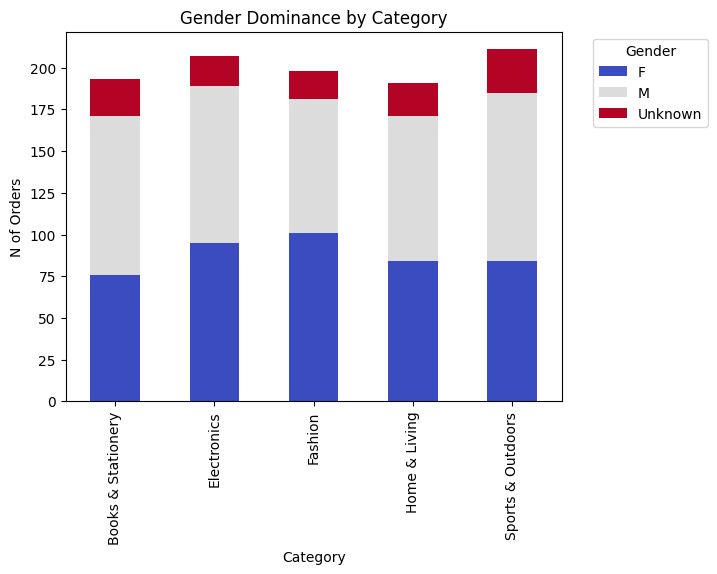

In [18]:
gender_dominance = df.groupby(['category_name', 'gender']).size().unstack()
gender_dominance.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Gender Dominance by Category')
plt.xlabel('Category')
plt.ylabel('N of Orders')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1))
plt.show()

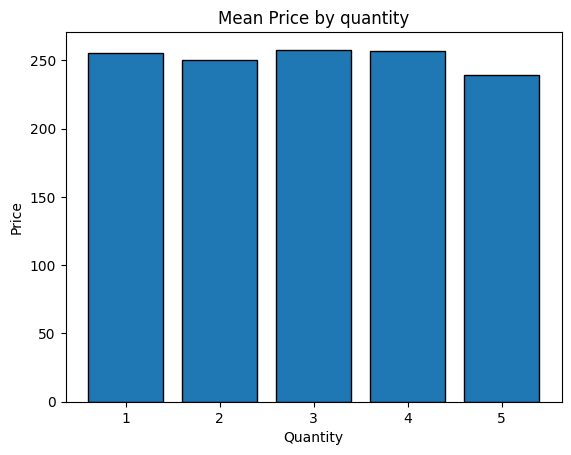

In [19]:
grouped = df.groupby('quantity')['price'].mean()

plt.figure()
plt.bar(grouped.index, grouped.values, edgecolor='black')
plt.title('Mean Price by quantity')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

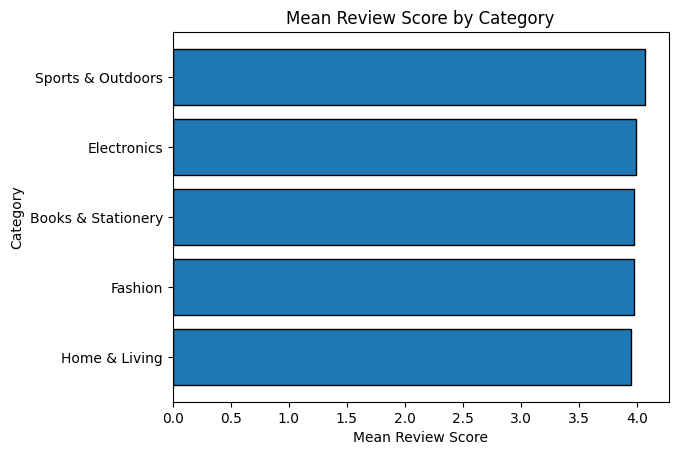

In [20]:
review_mean = df.groupby('category_name')['review_score'].mean().sort_values()
plt.figure()
plt.barh(review_mean.index, review_mean.values, edgecolor='black')
plt.title('Mean Review Score by Category')
plt.xlabel('Mean Review Score')
plt.ylabel('Category')
plt.show()

C:\Users\jomac\AppData\Local\Temp\ipykernel_17336\3349742928.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_trend = df.groupby('age_group').size()


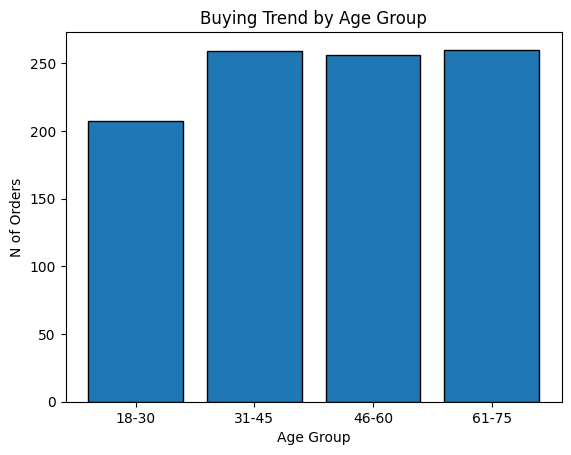

In [21]:
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 45, 60, 75], labels=['18-30', '31-45', '46-60', '61-75'])
age_trend = df.groupby('age_group').size()
plt.figure()
plt.bar(age_trend.index, age_trend.values, edgecolor='black')
plt.title('Buying Trend by Age Group')
plt.xlabel('Age Group')
plt.ylabel('N of Orders')
plt.show()

C:\Users\jomac\AppData\Local\Temp\ipykernel_17336\3374430492.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_price = df.groupby('payment_method')['price'].mean().sort_values()


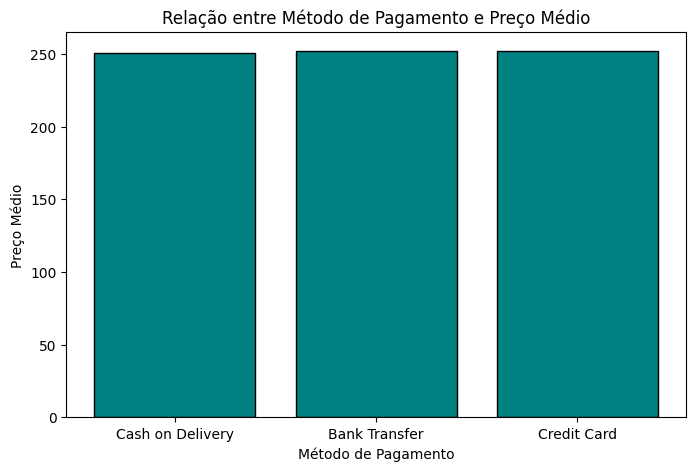

In [22]:
payment_price = df.groupby('payment_method')['price'].mean().sort_values()
plt.figure(figsize=(8, 5))
plt.bar(payment_price.index, payment_price.values, color='teal', edgecolor='black')
plt.title('Relação entre Método de Pagamento e Preço Médio')
plt.xlabel('Método de Pagamento')
plt.ylabel('Preço Médio')
plt.show()

In [23]:
# For cities, its needed to be filtered by the top 10 with most orders, as going futher breaks the graphs
top_cities = df['city'].value_counts().head(10).index
filtered_df = df[df['city'].isin(top_cities)]

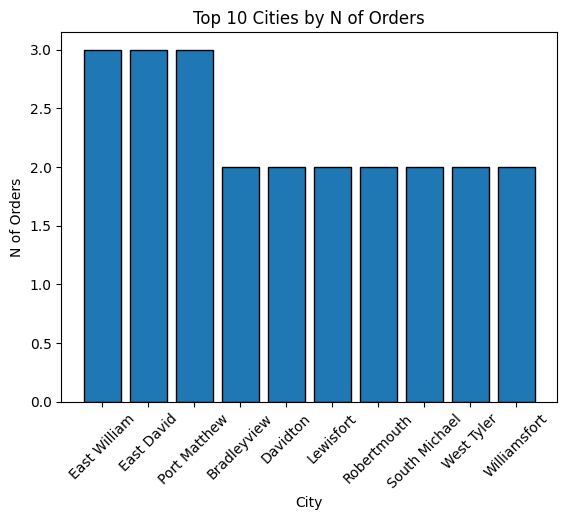

In [24]:
city_trend = filtered_df.groupby('city').size().sort_values(ascending=False)
plt.figure()
plt.bar(city_trend.index, city_trend.values, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Top 10 Cities by N of Orders')
plt.xlabel('City')
plt.ylabel('N of Orders')
plt.show()